## Data visualisation Drosophila melanogaster - oxiblot
- mef - control line
- mefxCG4190 - RNAi line

##### Data was generated randomly using normal distribution.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np
palette="Set1"

In [17]:
oxi = pd.read_csv("data/oxyblot.csv", sep=",", index_col=False)

oxi["Ponceau-protein"] = oxi["Ponceau-density"]/oxi["Ponceau-area"]
oxi["Blot-oxidation"] = oxi["Blot-density"]/oxi["Blot-area"]
oxi["Oxidation index"] = (oxi["Blot-oxidation"]/oxi["Ponceau-protein"])*100
oxi.head()

,Unnamed: 0,gel,sample,line,Ponceau-density,Ponceau-area,Blot-density,Blot-area,Ponceau-protein,Blot-oxidation,Oxidation index
0,0,1,fresh,mef,25450.828730,0.274481,55.524902,0.290043,92723.512304,191.436556,0.206460
1,1,1,fresh,mef,14427.483428,0.397640,37.982296,0.204229,36282.798414,185.978810,0.512581
2,2,1,frozen,mef,24265.726911,0.585776,60.084238,0.171223,41424.914613,350.911985,0.847104
3,3,1,frozen,mef,23464.452606,0.418524,63.278381,0.303644,56064.799140,208.396831,0.371707
4,4,1,fresh,mefxCG4190,18020.542806,0.403548,47.922568,0.260229,44655.238557,184.155087,0.412393


Sample order: mef, mefxCG4190


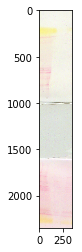

In [18]:
# one path (gel2, 1)was excluded from data because of beeing outlier of Q3+1,5x interqaurtile range

img = plt.imread("images/oxi-16-05-19.tif")
img_1 = plt.imread("images/ChemiDocMp 2019-05-17 11hr 29min+ChemiDocMp 2019-05-17 11hr 27min_Exposure_30.0sec.tif")
img_2 = plt.imread("images/ChemiDocMp 2019-05-17 11hr 34min+ChemiDocMp 2019-05-17 11hr 33min_Exposure_18.4sec.tif")
plt.imshow(img);

print(f"Sample order: mef, mefxCG4190")

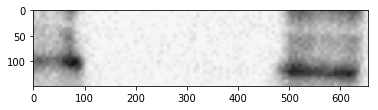

In [19]:
plt.imshow(img_1);

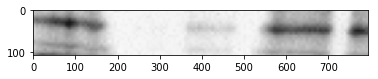

In [20]:
plt.imshow(img_2);

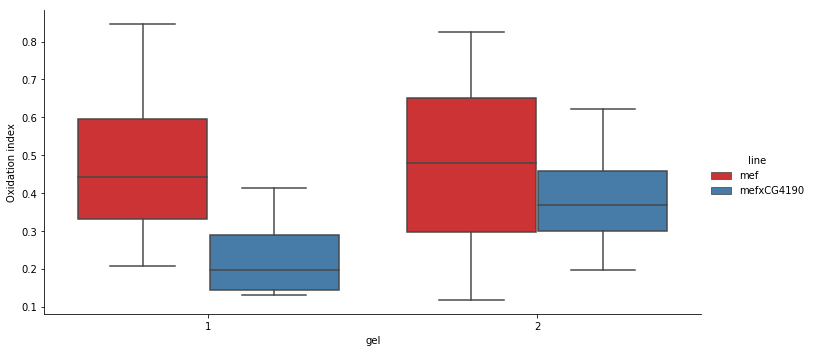

In [21]:
gel_1 = oxi[oxi["gel"] == 1]
gel_2 = oxi[oxi["gel"] == 2]

sns.catplot("gel", "Oxidation index", data=oxi, kind="box", hue="line", palette=palette, aspect=2.0)
# plt.savefig("gels_2.png")

<Figure size 1440x1440 with 0 Axes>

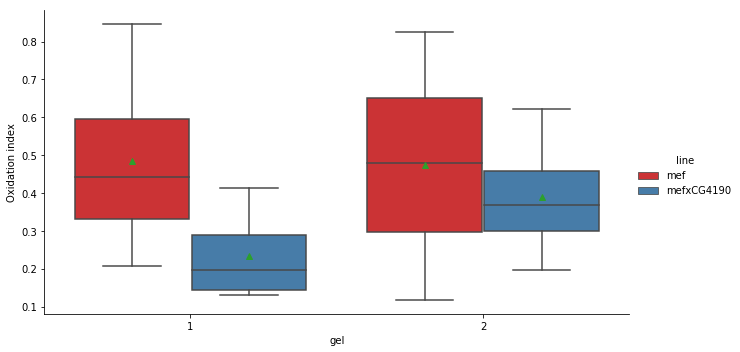

In [22]:
plt.figure(figsize=(20, 20))
sns.catplot("gel", "Oxidation index", data=oxi, kind="box", hue="line", palette=palette, aspect=1.8,showmeans=True )

# plt.savefig("gels_2.png")
# poziom oksydacji zależnie od żelu

In [23]:
oxi.describe()

,Unnamed: 0,gel,Ponceau-density,Ponceau-area,Blot-density,Blot-area,Ponceau-protein,Blot-oxidation,Oxidation index
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,7.000000,1.466667,23452.349575,0.411902,49.508806,0.261802,60644.554836,193.570526,0.390081
std,4.472136,0.516398,6052.782212,0.093854,14.650398,0.048304,24370.364073,65.133247,0.234698
min,0.000000,1.000000,14427.483428,0.274481,23.497238,0.171223,36180.405353,101.289454,0.117229
25%,3.500000,1.000000,19899.220500,0.365989,37.970401,0.231454,39541.157289,149.321769,0.201186
50%,7.000000,1.000000,23464.452606,0.403548,47.922568,0.282576,56064.799140,185.978810,0.371707
75%,10.500000,2.000000,24938.333986,0.442943,59.813524,0.291036,72071.101893,210.353019,0.495717
max,14.000000,2.000000,36853.524171,0.601925,76.686990,0.341589,114946.822367,350.911985,0.847104


<Figure size 432x288 with 0 Axes>

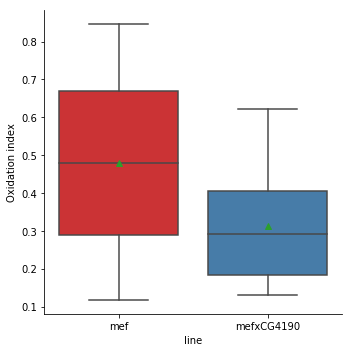

In [24]:
#wyniki zsumowane ze wszystkich żeli
plt.figure()

sns.catplot("line", "Oxidation index", data=oxi, kind="box", palette=palette, showmeans=True )
#sns.catplot("sample", "Oxidation index", data=oxi, kind="box", palette=palette, showmeans=True )

# plt.savefig("oxidation")


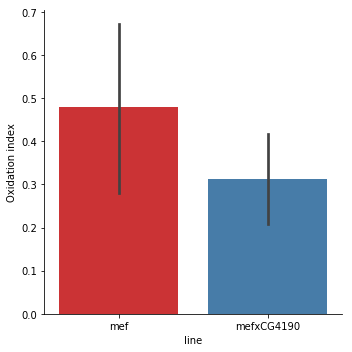

In [25]:
sns.catplot("line", "Oxidation index", data=oxi, kind="bar", palette=palette)

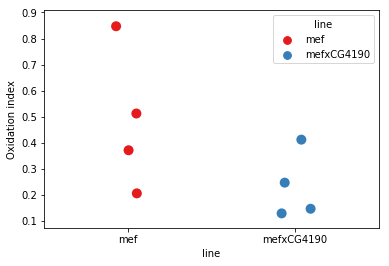

In [26]:
# poziom oksydacji, osobno każdy żel, zależnie od tego czy mrożone czy nie
sns.stripplot(x="line", y="Oxidation index", data=gel_1,hue="line", palette=palette,jitter=True, size=10)
# plt.savefig("gel1")

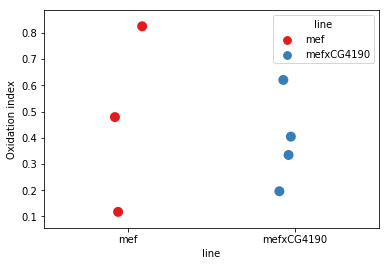

In [27]:
sns.stripplot(x="line", y="Oxidation index", data=gel_2,hue="line", palette=palette,jitter=True, size=10)
# plt.savefig("gel2")


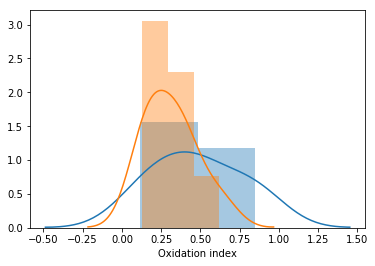

In [28]:
mef = oxi[oxi["line"] == "mef"]
mef_cg = oxi[oxi["line"] == "mefxCG4190"]
sns.distplot(mef["Oxidation index"]) #blue
sns.distplot(mef_cg["Oxidation index"])#orange

In [29]:
mef.describe()

,Unnamed: 0,gel,Ponceau-density,Ponceau-area,Blot-density,Blot-area,Ponceau-protein,Blot-oxidation,Oxidation index
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.714286,1.428571,21639.584123,0.403118,53.528084,0.251279,59345.445440,221.641638,0.479875
std,4.151879,0.534522,6332.248100,0.106919,12.509665,0.050307,31806.819775,75.740243,0.280814
min,0.000000,1.000000,14427.483428,0.274481,35.959745,0.171223,36282.798414,134.751189,0.117229
25%,1.500000,1.000000,16070.736146,0.336828,45.320987,0.217579,36987.635621,183.151188,0.289083
50%,3.000000,1.000000,23464.452606,0.418524,55.524902,0.266860,41424.914613,191.436556,0.478853
75%,8.500000,2.000000,24858.277820,0.434697,61.681309,0.291036,74394.155722,254.044679,0.668887
max,10.000000,2.000000,31727.124899,0.585776,69.207349,0.303644,114946.822367,350.911985,0.847104


In [30]:
mef_cg.describe()

,Unnamed: 0,gel,Ponceau-density,Ponceau-area,Blot-density,Blot-area,Ponceau-protein,Blot-oxidation,Oxidation index
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,9.000000,1.500000,25038.519346,0.419588,45.991938,0.271008,61781.275558,169.008303,0.311512
std,3.927922,0.534522,5722.036509,0.087600,16.273989,0.047850,17818.976469,45.717952,0.165700
min,4.000000,1.000000,18020.542806,0.311782,23.497238,0.180762,36180.405353,101.289454,0.129723
25%,5.750000,1.000000,22469.204936,0.367868,37.332230,0.253167,50118.323001,132.021173,0.183798
50%,9.000000,1.500000,23592.355191,0.402884,43.436994,0.285675,62853.882078,173.847139,0.290903
75%,12.250000,2.000000,25655.879295,0.446189,50.827628,0.290122,69065.945597,210.172296,0.406324
max,14.000000,2.000000,36853.524171,0.601925,76.686990,0.341589,91625.241464,224.500652,0.620503


In [31]:
((0.345379 - 0.319421)/ 0.345379)*100

7.515801481850367

In [32]:
median_mef = mef["Oxidation index"].median()
median_mef

0.4788529400954715

In [33]:
median_cg = mef_cg["Oxidation index"].median()

In [34]:
((median_cg - median_mef)/median_cg)*100

-64.60887017000783